<a href="https://colab.research.google.com/github/Polo-brap/2024_Intro_Python/blob/main/IP/W3_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Hurricane Track Analysis

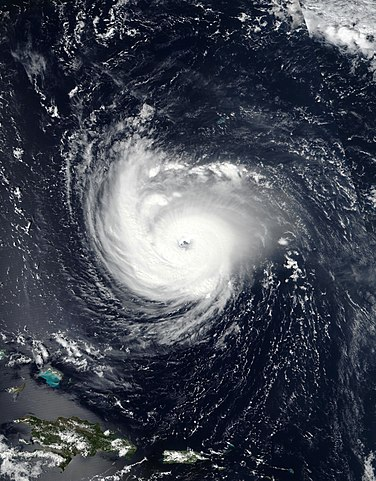

*Can you quickly find out which US states hurricane Florence passed through using `GeoPandas`?*

Image source: [NASA Worldview](https://worldview.earthdata.nasa.gov/)

```{tip} Installing GeoPandas

Please run the following code blocks in this section to:
* Install the GeoPandas's dependencies and GeoPandas
* Download and unzip the data used in this notebook
* Import GeoPandas and other required modules for the notebook
```

In [1]:
#Install GeoPandas' dependencies
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 6.7 MB/s eta 0:00:00


In [2]:
#Install GeoPandas
!pip install --upgrade geopandas

In [3]:
#Download the data used in this notebook
!gdown 1b1lngOIvuNnZxepbT8RyV3KX1itRky5z

Downloading...
From: https://drive.google.com/uc?id=1b1lngOIvuNnZxepbT8RyV3KX1itRky5z
To: /content/data.zip
100% 25.8M/25.8M [00:00<00:00, 46.3MB/s]


In [4]:
#Unzip the data used in this notebook
!unzip '/content/data.zip'

Archive:  /content/data.zip
   creating: data/
   creating: data/damselfish-data/
 extracting: data/damselfish-data/DAMSELFISH_distributions.cpg  
  inflating: data/damselfish-data/DAMSELFISH_distributions.dbf  
  inflating: data/damselfish-data/DAMSELFISH_distributions.prj  
  inflating: data/damselfish-data/DAMSELFISH_distributions.shp  
  inflating: data/damselfish-data/DAMSELFISH_distributions.shx  
 extracting: data/damselfish-data/DAMSELFISH_distributions_SELECTION.cpg  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.dbf  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.prj  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.shp  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.shx  
   creating: data/Europe_borders/
 extracting: data/Europe_borders/Europe_borders.CPG  
  inflating: data/Europe_borders/Europe_borders.dbf  
  inflating: data/Europe_borders/Europe_borders.prj  
  inflating: data/Euro





References:    
1. Geopandas official website: Introduction to GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automating GIS process
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Use Data for Earth and Environmental Science in Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. The Shapely User Manual
https://shapely.readthedocs.io/en/stable/manual.html
5. Geospatial Analysis with Python and R
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction to Geospatial Data in Python
https://www.datacamp.com/tutorial/geospatial-data-python

**Exercise's Instructions**

* Apply GeoPandas to read in the geospatial data, plot, and analyse the track of Hurricane Florence from August 30th to September 18th 2018.
* Either write your own code, or fill in the blanks in the hidden cells 🙂

## Q1) import geopandas, pandas

In [5]:
#Import GeoPandas (as gpd), pandas, and matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt





In [6]:
# And ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#@markdown Fill in the blank code. Double-click here to reveal
#Import GeoPandas (as gpd), pandas, and matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Q2) Read a Shapefile with GeoPandas's read_file function

In [8]:
# Read data with the geopandas function
# The path to the file should be /content/data/hurricane-data/gz_2010_us_040_00_5m.json
path = r"/content/data/hurricane-data/gz_2010_us_040_00_5m.json"
country = gpd.read_file(path)


## Q3) Have a look at the data, what type of geometries does the data contain?

In [10]:
# Print out the first few lines of the data
country.head(2)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."


In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# The method to see the first few lines of the data
country.head(2)

## Q4) Have a look at the data on a map using GeoPandas's .plot() method. Exclude Alaska and Hawaii by the attribute 'NAME' and Pandas's .isin() method. Specify the figsize to be 30 x 20.

<Axes: >

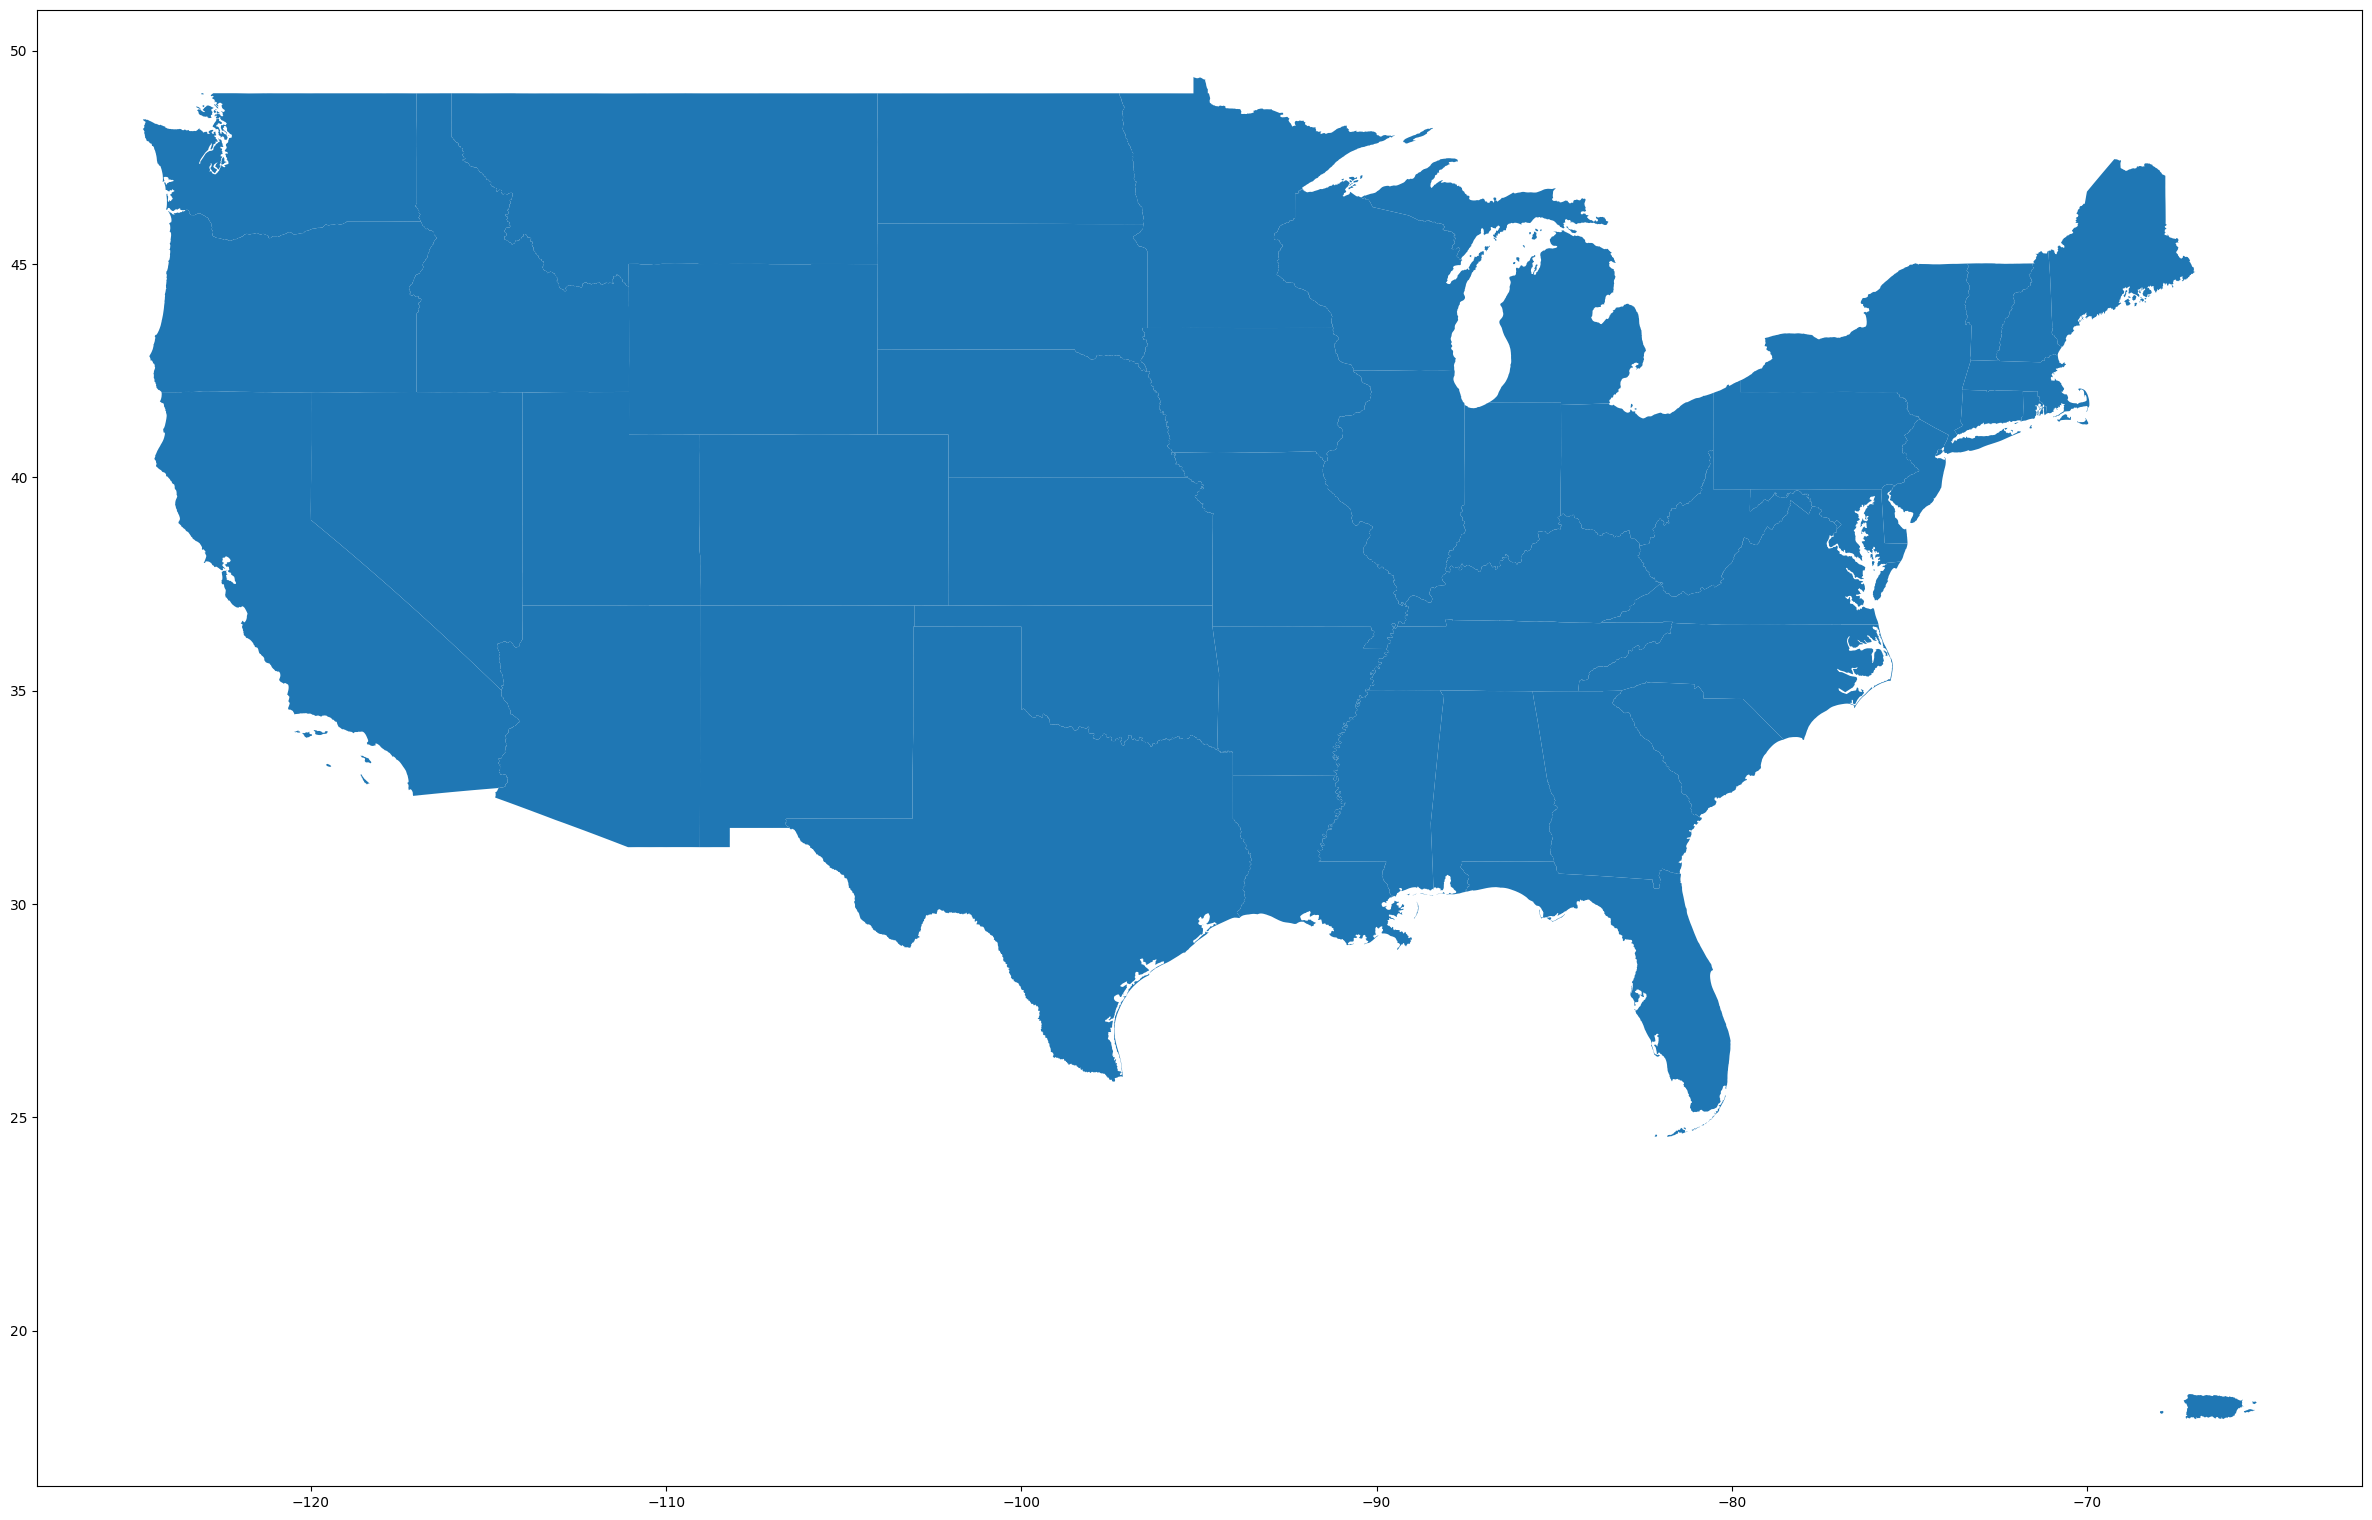

In [11]:
# Plot the US states (Alaska and Hawaii excluded)
country[country['NAME'].isin(['Alaska', 'Hawaii']) == False].plot(figsize=(30,20))

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Plot the US states (Alaska and Hawaii excluded)
country[country[____].isin([____,____]) == False].____(figsize=(30,20))

In [12]:
# Read in the hurricane florence data, change the longitude, and have a look at the hurricane florence dataframe
path = r"/content/data/hurricane-data/florence.csv"
florence = pd.read_csv(path)
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence['Long'] = 0 - florence['Long']
florence.head(3)

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six


## Q5) Create a GeoDataFrame from florence DataFrame

In [13]:
# Create a geodataframe from the hurricane florence dataframe
gdf_florence = gpd.GeoDataFrame(florence, geometry=gpd.points_from_xy(florence.Long, florence.Lat))

In [15]:
# Have a look at the hurricane geodataframe
gdf_florence.head(2)

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,geometry
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)


## Q6) Plot the US states map (without Alaska, Hawaii) and hurricane florence together

<Axes: >

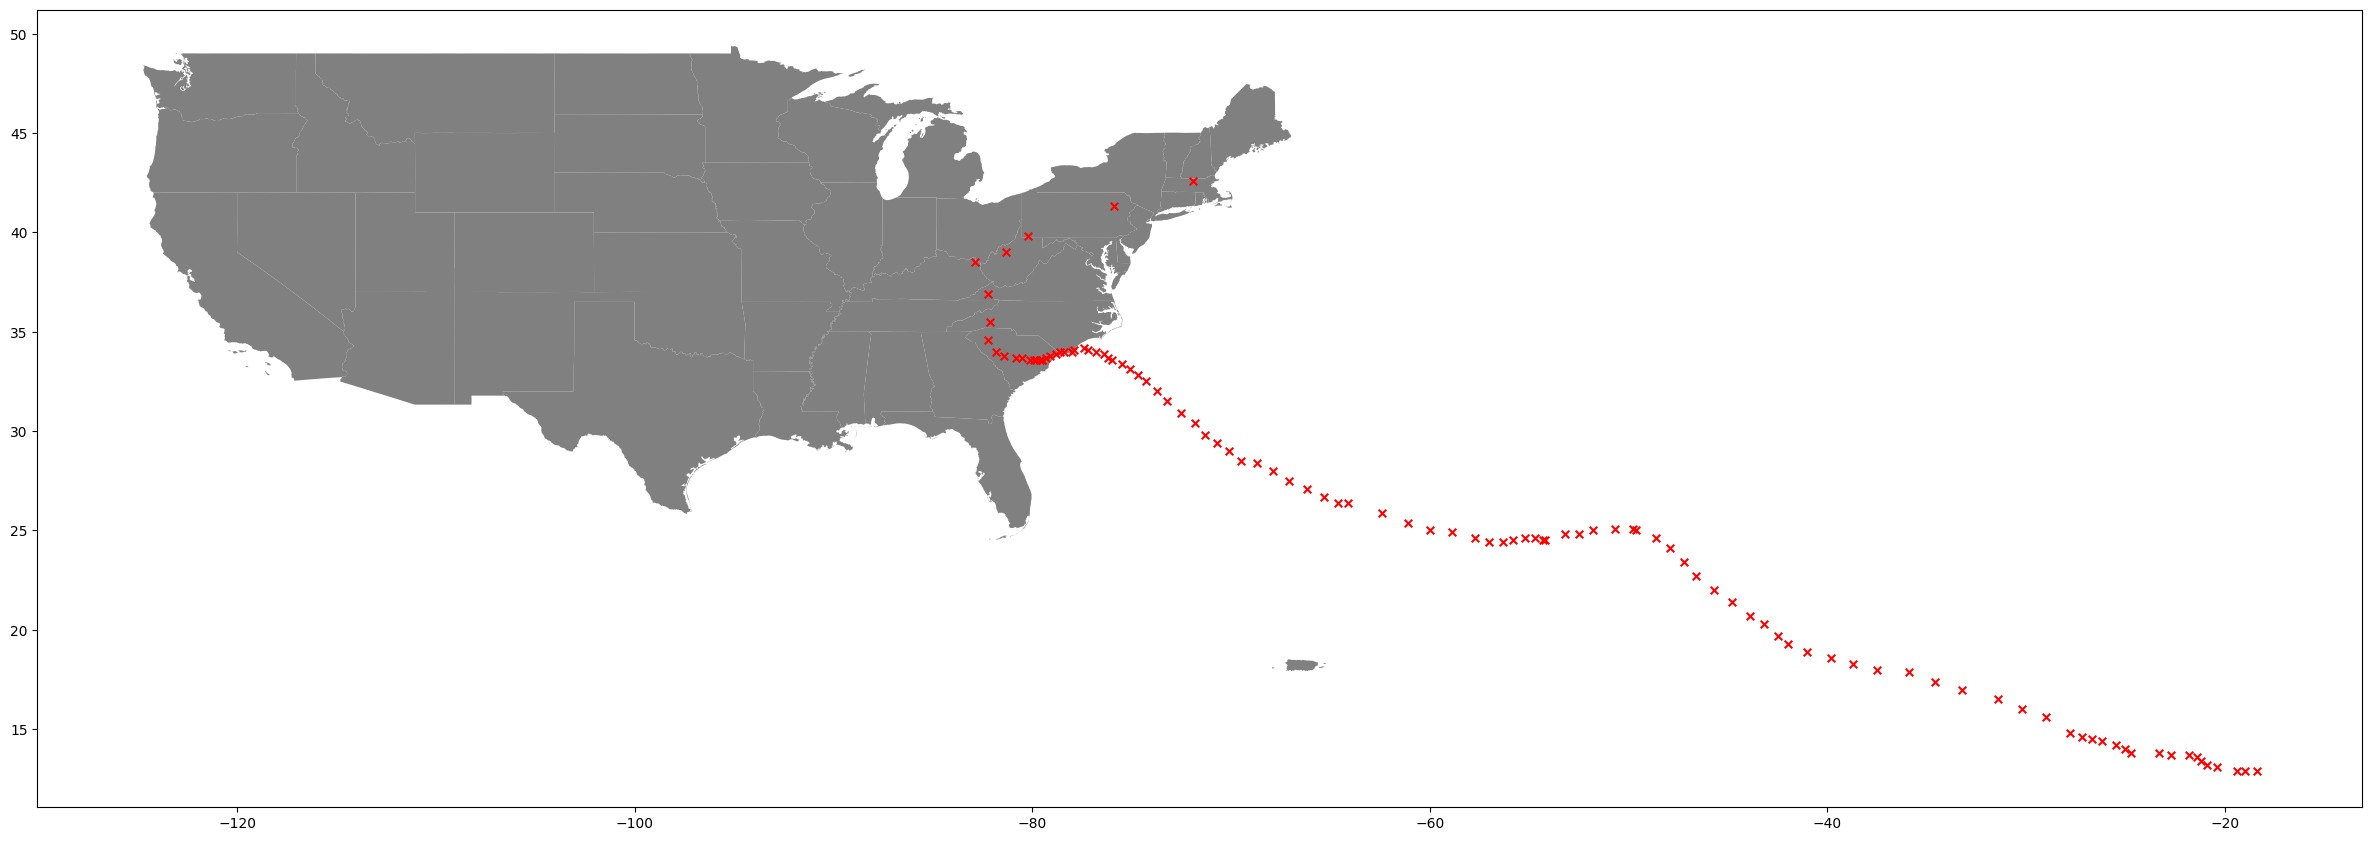

In [16]:
# Plot to see the hurricane overlay over the US map
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska', 'Hawaii']) == False].plot(ax=ax, color='grey')
# And plot the hurricane position on top with red color to stand out:
gdf_florence.plot(ax=ax, color='red', marker="x", markersize=30)

## Q7) What's the coordinate reference system of the data?

In [17]:
# Check the coordinate reference system of the geodataframe
country.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Check the coordinate reference system of the geodataframe
country.____

## Q8) Which states are passed by the hurricane?

```{hint}
One approach may be plot and see the trajectory of the hurricane on the US map. Other approaches are more than welcome.
```

<Axes: >

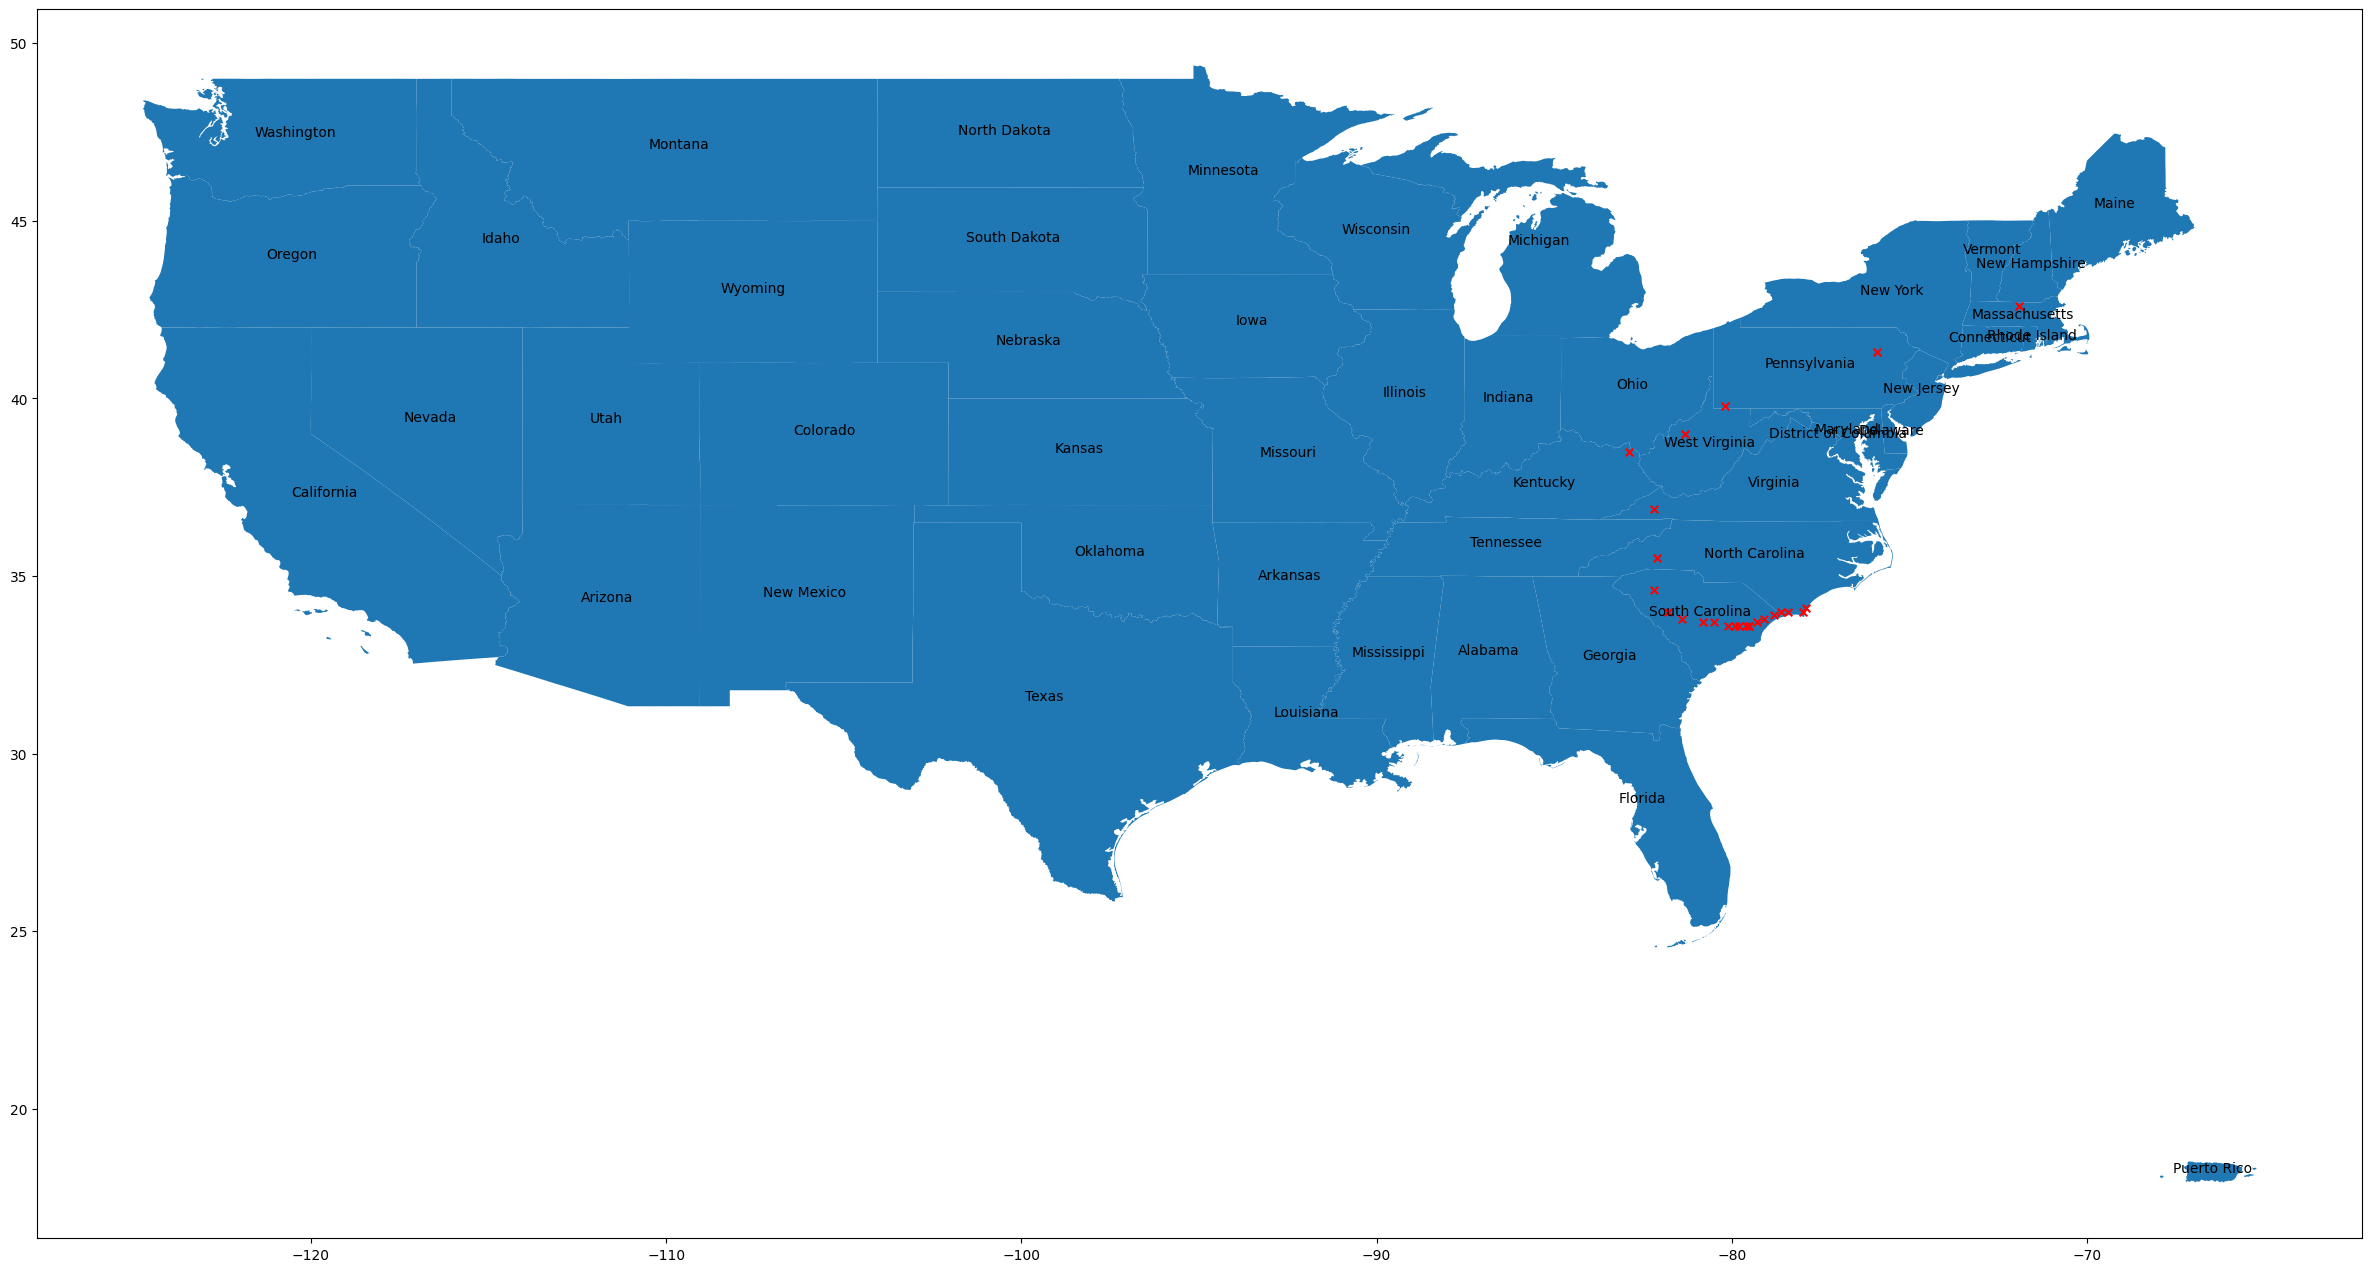

In [18]:
# Plot the US states without Alaska and Hawaii, then
df = country[country['NAME'].isin(['Alaska', 'Hawaii']) == False]
ax = df.plot(figsize=(30,20))
#  Annotate the US states with their names, then
for idx, row in df.iterrows():
    ax.annotate(text=row['NAME'], xy=row.geometry.centroid.coords[0], ha='center')
# Select the hurricane trajectory points inside the US boundary with the overlay operation, then
res_intersection = gdf_florence.overlay(country, how='intersection')
# Plot the hurricane trajectory inside US boundary
res_intersection.plot(ax=ax, color='red', marker="x", markersize=30)